# 4.10 Coding Etiquette & Excel Reporting - Part 2

## Table of contents

### -Import libraries and datafiles
### -Merge department to the main dataframe
### -Step 6 - Visualization to show the distribution of profiles
### -Step 7 - Aggregate on customer-profile
### -Step 8 - Compare customer profiles to show the customer behavior
### -Popular departments among customers
### -Customer ordering behavior

#### The task for this exercise has been divided to 2 script files:-
        4.10 Coding Etiquette & Excel Reporting Task-Part 1
        4.10 Coding Etiquette & Excel Reporting Task-Part 2

### Import libraries and data file

In [1]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
import scipy

In [2]:
# path of the dataset file assigned to the variable 'path'

path=r"C:\Users\19452\Desktop\Seema\Careerfoundry-Data Analytics Course\Work Area\Python Fundamentals\Nov-2023 Instacart Basket Analysis"

In [3]:
# import the data set exported in Exercise 4.9
df_keep=pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','profilingdata.pkl'))

In [4]:
# import departments_wrangled.csv from prapared data folder to get the department names

df_dept=pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'))

In [5]:
df_dept['department']

0              frozen
1               other
2              bakery
3             produce
4             alcohol
5       international
6           beverages
7                pets
8     dry goods pasta
9                bulk
10      personal care
11       meat seafood
12             pantry
13          breakfast
14       canned goods
15         dairy eggs
16          household
17             babies
18             snacks
19               deli
20            missing
Name: department, dtype: object

In [6]:
# convert the datatype of 'Unnamed: 0' column to float

df_dept['Unnamed: 0']=df_dept['Unnamed: 0'].astype(float)
display(df_dept.dtypes)

Unnamed: 0    float64
department     object
dtype: object

In [7]:
# rename column 'Unnamed: 0' to 'department_id'

df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)
df_dept['department']

0              frozen
1               other
2              bakery
3             produce
4             alcohol
5       international
6           beverages
7                pets
8     dry goods pasta
9                bulk
10      personal care
11       meat seafood
12             pantry
13          breakfast
14       canned goods
15         dairy eggs
16          household
17             babies
18             snacks
19               deli
20            missing
Name: department, dtype: object

In [8]:
# merge department column in df_dept dataframe to df_new dataframe 
df_new=df_keep.merge(df_dept,on='department_id')
df_new.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,family_status,income,_merge,region,exclusion_flag,age_flag,income_flag,dependants_flag,customer_profile,department
0,2539329.0,1.0,1.0,2.0,8.0,NaN,196.0,1.0,0.0,Soda,...,married,40423,both,South,Keep >=5 orders,Young adult,Low income,Have dependants,Young adult-Low income-Have dependants,beverages
1,2398795.0,1.0,2.0,3.0,7.0,15.0,196.0,1.0,1.0,Soda,...,married,40423,both,South,Keep >=5 orders,Young adult,Low income,Have dependants,Young adult-Low income-Have dependants,beverages
2,473747.0,1.0,3.0,3.0,12.0,21.0,196.0,1.0,1.0,Soda,...,married,40423,both,South,Keep >=5 orders,Young adult,Low income,Have dependants,Young adult-Low income-Have dependants,beverages
3,2254736.0,1.0,4.0,4.0,7.0,29.0,196.0,1.0,1.0,Soda,...,married,40423,both,South,Keep >=5 orders,Young adult,Low income,Have dependants,Young adult-Low income-Have dependants,beverages
4,431534.0,1.0,5.0,4.0,15.0,28.0,196.0,1.0,1.0,Soda,...,married,40423,both,South,Keep >=5 orders,Young adult,Low income,Have dependants,Young adult-Low income-Have dependants,beverages


In [9]:
# displays all rows & columns when listed

pd.options.display.max_rows = None
pd.options.display.max_columns = None

### Step 6 - visualization to show the distribution of profiles

#### Bar chart representing Customer age distribution

In [10]:
# creating a data list

age_flag_data={'Adult':14978759,'Young Adult':8500372,'Senior Citizen':8450848}
age_category=list(age_flag_data.keys())
category_count=list(age_flag_data.values())

In [11]:
# setting the size of the bar chart
plt.figure(figsize=(7,7))

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

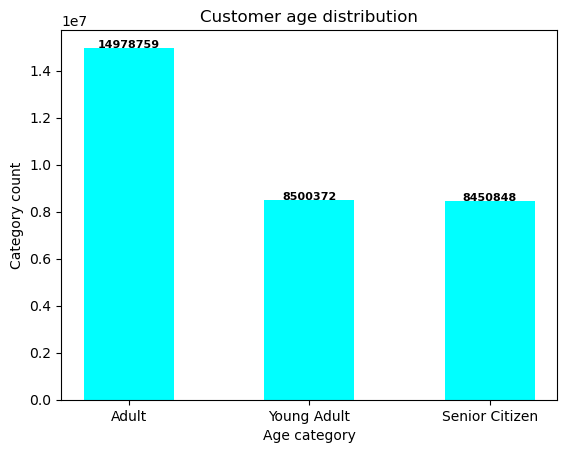

In [12]:
# Generate a bar chart
bar_age=plt.bar(age_category,category_count,color='aqua',width=0.5)


# Add value labels
# i is the index and v the value (these are used to position the values on the correct bar)
# enumerate generates the inbuilt counter 
for i,v in enumerate(category_count):
    plt.text(i,v+3000, str(v), ha="center",weight="bold",size=8)
    
# X axis label
plt.xlabel('Age category')

# Y axis label
plt.ylabel('Category count')

# chart title
plt.title('Customer age distribution')

# save barchart as png file
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10-Customer_age_distribution_barplot.png'),bbox_inches='tight')

#plt.show()

#### Bar chart representing Customer income distribution

In [13]:
# create data list

income_flag_data={'Medium income':3511073,'High income':13799255,'Very High income':14619651}
income_category=list(income_flag_data.keys())
icategory_count=list(income_flag_data.values())

In [14]:
# setting the size of the bar chart
plt.figure(figsize=(7,7))

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

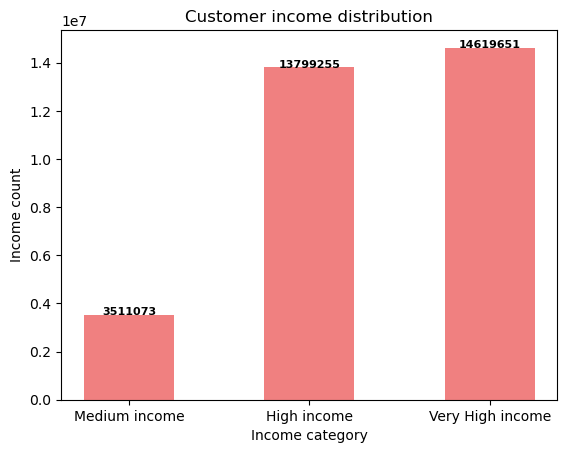

In [15]:
# Generate a bar chart
plt.bar(income_category,icategory_count,color='lightcoral',width=0.5)

# Add value labels
# i is the index and v the value (these are used to position the values on the correct bar)
# enumerate generates the inbuilt counter 
for i,v in enumerate(icategory_count):
    plt.text(i,v+3000, str(v), ha="center",weight="bold",size=8)
    
# X axis label
plt.xlabel('Income category')

# Y axis label
plt.ylabel('Income count')

# chart title
plt.title('Customer income distribution')

# save barchart as png file
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10-Customer_income_distribution_barplot.png'),bbox_inches='tight')

#plt.show()

#### Bar chart representing Customer dependants distribution

In [16]:
# create data list

dependants_flag_data={'Have dependants':23950452,'No dependants':7979527}
dependants_category=list(dependants_flag_data.keys())
dcategory_count=list(dependants_flag_data.values())

In [17]:
# setting the size of the bar chart
plt.figure(figsize=(7,7))

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

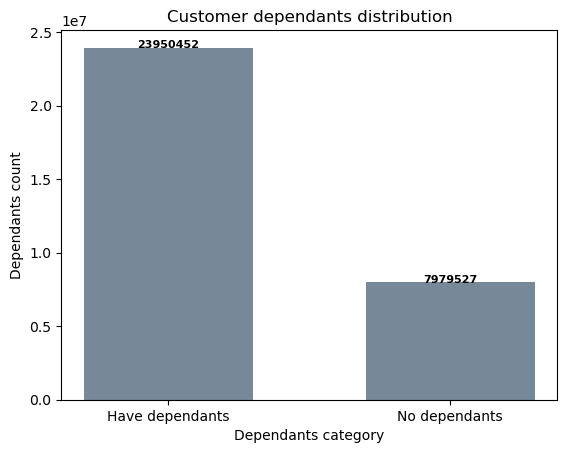

In [18]:
# Generate a bar chart
plt.bar(dependants_category,dcategory_count,color='lightslategrey',width=0.6)

# Add value labels
# i is the index and v the value (these are used to position the values on the correct bar)
# enumerate generates the inbuilt counter 
for i,v in enumerate(dcategory_count):
    plt.text(i,v+3000, str(v), ha="center",weight="bold",size=8)
    
# X axis label
plt.xlabel('Dependants category')

# Y axis label
plt.ylabel('Dependants count')

# chart title
plt.title('Customer dependants distribution')

# save barchart as png file
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10-Customer_dependants_barplot.png'),bbox_inches='tight')

#plt.show()

#### Bar chart representing Customer Profile frequency

In [19]:
# df_cust=df_keep['customer_profile'].value_counts(dropna=False)

# Frequncy table for customer_profile

df_keep['customer_profile'].value_counts(dropna=False)

customer_profile
Middle aged-Low income-Have dependants             5097847
Middle aged-Very high income-Have dependants       3469757
Middle aged-High income-Have dependants            3377198
Young adult-Medium income-Have dependants          2609069
Young adult-Low income-Have dependants             2602928
Senior citizen-Very high income-Have dependants    2441710
Senior citizen-High income-Have dependants         2229153
Middle aged-Very high income-No dependants         1189330
Middle aged-High income-No dependants              1129342
Young adult-Low income-No dependants                872780
Middle aged-Low income-No dependants                859681
Senior citizen-Medium income-Have dependants        855842
Young adult-Medium income-No dependants             852217
Middle aged-Medium income-No dependants             841684
Senior citizen-Low income-Have dependants           836020
Senior citizen-Very high income-No dependants       795698
Senior citizen-High income-No dependant

In [20]:
# create data list

customerprofiles_flag_data={
'Young adult-Very high income-No dependants':70282,
'Senior citizen-Medium income-No dependants':163785,    
'Young adult-Very high income-Have dependants':199422,    
'Young adult-Medium income-No dependants':345057,    
'Middle aged-Medium income-No dependants':374185,    
'Senior citizen-High income-No dependants':460106,     
'Senior citizen-Medium income-Have dependants':542504,    
'Young adult-Medium income-Have dependants':992082,    
'Middle aged-Low income-Have dependants':1093460,    
'Middle aged-High income-No dependants':1252213,    
'Senior citizen-High income-Have dependants':1374639, 
'Senior citizen-Very high income-No dependants':1464232,    
'Young adult-High income-No dependants':1710879,    
'Middle aged-Very high income-No dependants':2138788,
'Middle aged-High income-Have dependants':3818768,   
'Senior citizen-Very high income-Have dependants':4445582,    
'Young adult-High income-Have dependants':5182650,    
'Middle aged-Very high income-Have dependants':6301345  
}    
    
customer_category=list(customerprofiles_flag_data.keys())
customercategory_count=list(customerprofiles_flag_data.values())

In [21]:
# setting the size of the bar chart
plt.figure(figsize=(7,7))

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

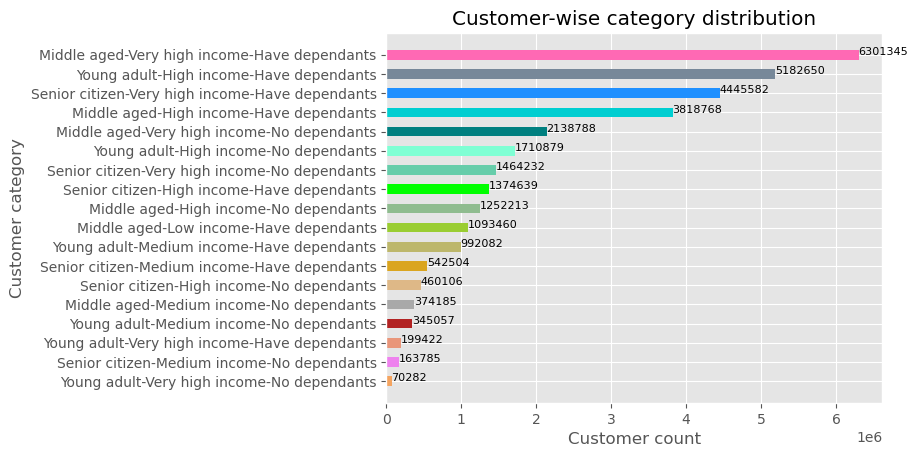

In [22]:
# Generate a bar chart
colors=['sandybrown','violet','darksalmon','firebrick','darkgrey','burlywood','goldenrod','darkkhaki','yellowgreen','darkseagreen','lime','mediumaquamarine','aquamarine','teal','darkturquoise','dodgerblue','lightslategrey','hotpink','plum','lightgreen','lawngreen','gold','orange']

style.use('ggplot')
plt.barh(customer_category,customercategory_count,height=0.5,color=colors)

# Add value labels
# index and value are used to position the values labels on the correct bar
# enumerate generates the inbuilt counter 

for index,value in enumerate(customercategory_count):
    plt.text(value,index, str(value),size=8)
    
# X axis label
plt.xlabel('Customer count')

# Y axis label
plt.ylabel('Customer category')

# chart title
plt.title('Customer-wise category distribution')

# save horizondal barchart as png file
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10-Customer_category_hbarplot.png'),bbox_inches='tight')

#plt.show()

#### Bar chart representing Region frequency

In [23]:
# frequency table for region

df_keep['region'].value_counts(dropna=False)

region
South        10634297
West          8171616
Midwest       7486856
Northeast     5637210
Name: count, dtype: int64

In [24]:
# create data list

region_data={
    'Northeast':5637210,
    'Midwest':7486856,
    'West':8171616,
    'South':10634297   
}

region_category=list(region_data.keys())
regioncustomer_count=list(region_data.values())

In [25]:
# setting the size of the bar chart
plt.figure(figsize=(7,7))

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

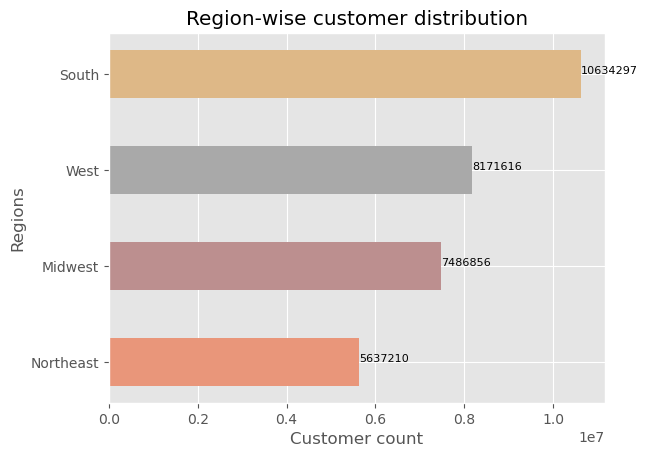

In [26]:
# Generate a bar chart
colors=['darksalmon','rosybrown','darkgrey','burlywood']

style.use('ggplot')
plt.barh(region_category,regioncustomer_count,height=0.5,color=colors)

# Add value labels
# i is the index and v the value (these are used to position the values on the correct bar)
# enumerate generates the inbuilt counter 

for index,value in enumerate(regioncustomer_count):
    plt.text(value,index, str(value),size=8)
    
# X axis label
plt.xlabel('Customer count')

# Y axis label
plt.ylabel('Regions')

# chart title
plt.title('Region-wise customer distribution')

# save Horizondal barchart as png file
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10-Customer_region_hbarplot.png'),bbox_inches='tight')

#plt.show()

#### Area chart representing orders_day_of_week frequency

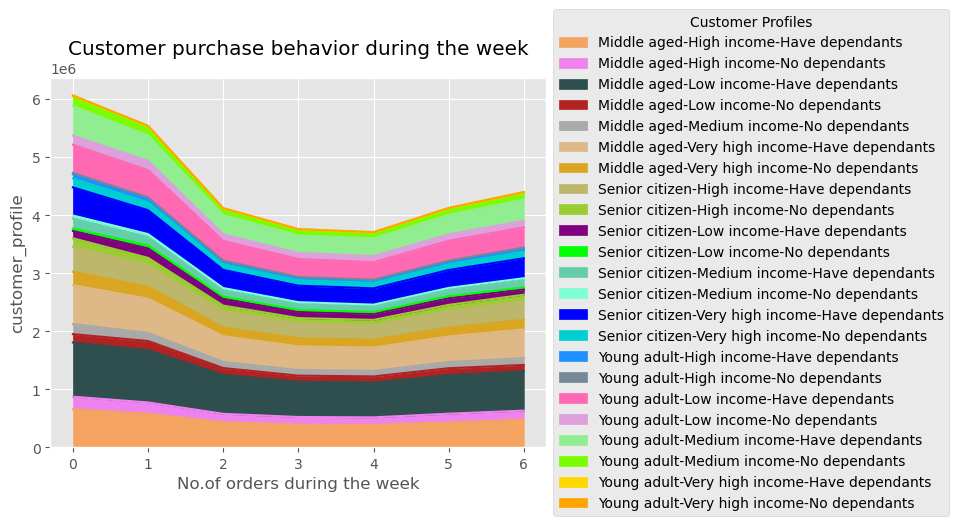

In [52]:
# create a crosstab and store it in crosstab object

crosstab5 = pd.crosstab(df_new['orders_day_of_week'], df_new['customer_profile'], dropna = False,margins=False)

# Create a stacked bar chart from crosstab data to visualize Customer purchase behavior 

colors=['sandybrown','violet','darkslategray','firebrick','darkgrey','burlywood','goldenrod','darkkhaki','yellowgreen','purple','lime','mediumaquamarine','aquamarine','blue','darkturquoise','dodgerblue','lightslategrey','hotpink','plum','lightgreen','lawngreen','gold','orange']
customer_profile_odw = crosstab5.plot.area(color=colors)

# Add labels and a title and put titled legend next to chart

customer_profile_odw.set(xlabel='No.of orders during the week', ylabel='customer_profile', title='Customer purchase behavior during the week')
customer_profile_odw.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Customer Profiles')

# save area chart as png file
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10-Customer_ordersdayofweek_areaplot.png'),bbox_inches='tight')

### Area chart representing order_hour_of_day frequency 

In [28]:
# create a crosstab and store it in crosstab object

crosstab6 = pd.crosstab(df_new['order_hour_of_day'], df_new['customer_profile'], dropna = False,margins=False)

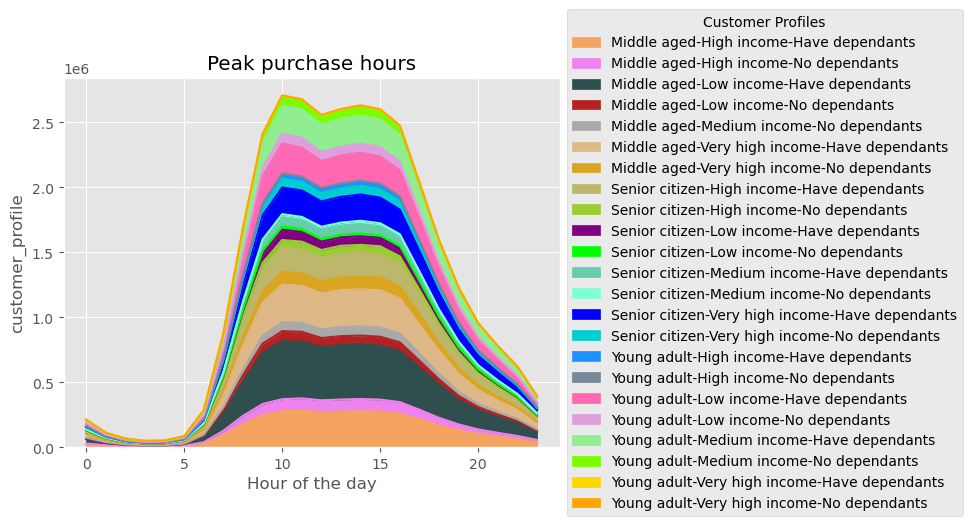

In [53]:
# Create a stacked bar chart from crosstab data to visualize Customer purchase behavior 

['sandybrown','violet','darkslategray','firebrick','darkgrey','burlywood','goldenrod','darkkhaki','yellowgreen','purple','lime','mediumaquamarine','aquamarine','blue','darkturquoise','dodgerblue','lightslategrey','hotpink','plum','lightgreen','lawngreen','gold','orange']
customer_profile_ohd = crosstab6.plot.area(color=colors)

# Add labels and a title and put titled legend next to chart

customer_profile_ohd.set(xlabel='Hour of the day', ylabel='customer_profile', title='Peak purchase hours')
customer_profile_ohd.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Customer Profiles')

# save area chart as png file
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10-Customer_hourofday_areaplot.png'),bbox_inches='tight')

### Step 7 - Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [30]:
# aggregate ordering frequency based on customer_profile

a=df_keep.groupby('customer_profile').agg({'regularity': ['mean', 'min', 'max']})
print(a)

                                                regularity           
                                                      mean  min   max
customer_profile                                                     
Middle aged-High income-Have dependants          10.146987  0.0  30.0
Middle aged-High income-No dependants            10.112780  0.0  30.0
Middle aged-Low income-Have dependants           10.337590  0.0  30.0
Middle aged-Low income-No dependants             10.441853  0.0  30.0
Middle aged-Medium income-No dependants          10.184730  0.0  30.0
Middle aged-Very high income-Have dependants     10.201830  0.0  30.0
Middle aged-Very high income-No dependants       10.015751  0.0  30.0
Senior citizen-High income-Have dependants       10.206979  0.0  30.0
Senior citizen-High income-No dependants         10.076980  0.0  30.0
Senior citizen-Low income-Have dependants        10.741311  0.0  30.0
Senior citizen-Low income-No dependants          10.945116  0.0  30.0
Senior citizen-Mediu

In [31]:
# aggregate expenditure based on customer_profile

b=df_keep.groupby('customer_profile').agg({'average spent':['mean','min','max']})
print(b)

                                                average spent             \
                                                         mean        min   
customer_profile                                                           
Middle aged-High income-Have dependants              9.049763   7.000000   
Middle aged-High income-No dependants               10.443158   7.000000   
Middle aged-Low income-Have dependants               8.018902   1.000000   
Middle aged-Low income-No dependants                 7.184871   1.000000   
Middle aged-Medium income-No dependants              8.315736   7.001498   
Middle aged-Very high income-Have dependants        20.644509   7.000000   
Middle aged-Very high income-No dependants          19.548715   7.000532   
Senior citizen-High income-Have dependants           8.818273   7.000000   
Senior citizen-High income-No dependants             8.951183   7.000000   
Senior citizen-Low income-Have dependants            6.695963   1.262500   
Senior citiz

### Step 8 - Compare customer profiles with regions and departments to show the customer behavior in different  regions

### compare customer_profile with departments

In [32]:
# create a crosstab and store it in crosstab object

crosstab = pd.crosstab(df_new['department'], df_new['customer_profile'], dropna = False,margins=False)
#crosstab

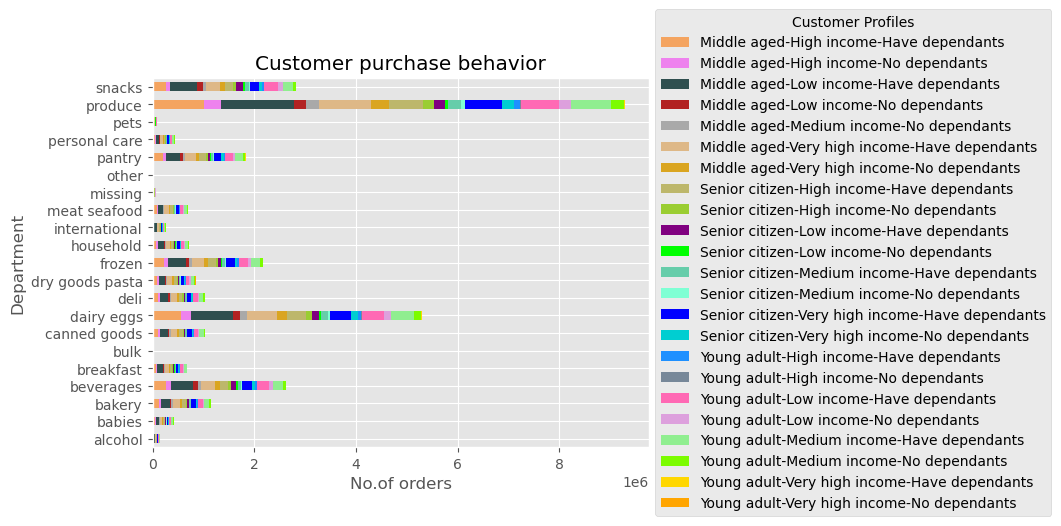

In [54]:
# Create a stacked bar chart from crosstab data to visualize Customer purchase behavior 

colors=['sandybrown','violet','darkslategray','firebrick','darkgrey','burlywood','goldenrod','darkkhaki','yellowgreen','purple','lime','mediumaquamarine','aquamarine','blue','darkturquoise','dodgerblue','lightslategrey','hotpink','plum','lightgreen','lawngreen','gold','orange']
customer_profile_depts = crosstab.plot.barh(stacked=True,color=colors)

# Add labels and a title and put titled legend next to chart

customer_profile_depts.set(xlabel='No.of orders', ylabel='Department', title='Customer purchase behavior')
customer_profile_depts.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Customer Profiles')

# save stacked horizondal bar chart as png file
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10-Customer_deptpurchase_stackedbarplot.png'),bbox_inches='tight')

### compare customer_profile with regions

In [34]:
# create a crosstab and store it in crosstab object
crosstab2 = pd.crosstab(df_new['region'], df_new['customer_profile'], dropna = False,margins=False)
#crosstab2

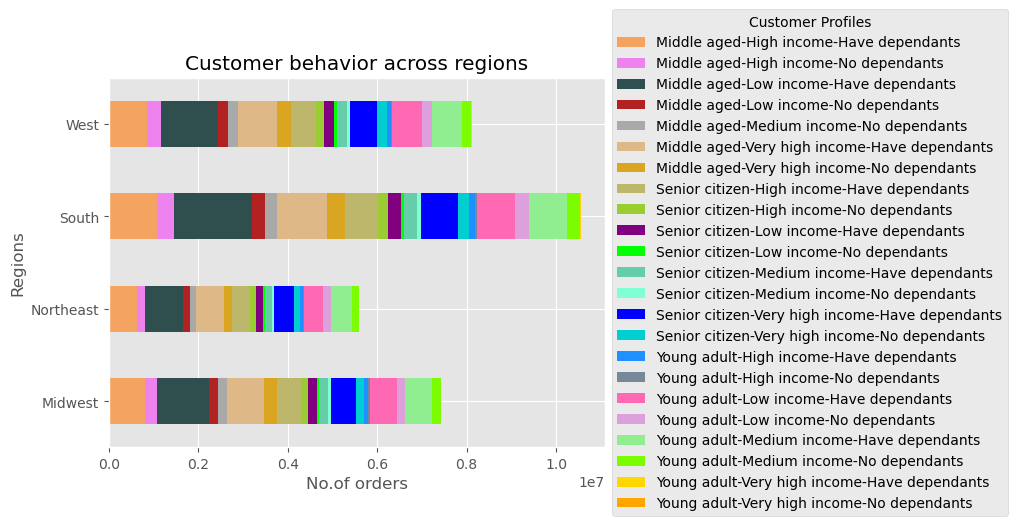

In [55]:
# Create a stacked bar chart from crosstab data to visualize Customer purchase behavior 

colors=['sandybrown','violet','darkslategray','firebrick','darkgrey','burlywood','goldenrod','darkkhaki','yellowgreen','purple','lime','mediumaquamarine','aquamarine','blue','darkturquoise','dodgerblue','lightslategrey','hotpink','plum','lightgreen','lawngreen','gold','orange']
customer_profile_regions = crosstab2.plot.barh(stacked=True,color=colors)

# Add labels and a title and put titled legend next to chart
customer_profile_regions.set(xlabel='No.of orders', ylabel='Regions', title='Customer behavior across regions')
customer_profile_regions.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Customer Profiles')

# save stacked horizondal bar chart as png file
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10-Customer_region_stackedbarplot.png'),bbox_inches='tight')

### Popular departments among customers

In [36]:
# frequency table for department

df_new['department'].value_counts(dropna=False)

department
produce            9288860
dairy eggs         5292745
snacks             2829767
beverages          2633114
frozen             2180787
pantry             1831123
bakery             1147983
canned goods       1041171
deli               1028707
dry goods pasta     845368
household           720087
meat seafood        692678
breakfast           687659
personal care       436395
babies              417536
international       262920
alcohol             149309
pets                 95470
missing              67034
other                35403
bulk                 34011
Name: count, dtype: int64

In [37]:
# create data list

depts={
    'bulk':34011, 
    'other':35403,
    'pets':95470,
    'alcohol':149309,
    'international':262920,
    'babies':417536,
    'personal care':436395,
    'breakfast':687659,
    'meat seafood':692678,
    'household':720087,
    'dry goods pasta':845368,
    'deli':1028707,
    'canned goods':1041171,
    'bakery':1147983,
    'pantry':1831123,
    'frozen':2180787,
    'beverages':2633114,
    'snacks':2829767,
    'dairy eggs':5292745,
    'produce':9288860,
}

dept_category=list(depts.keys())
dept_count=list(depts.values())

In [38]:
# setting the size of the bar chart
plt.figure(figsize=(7,7))

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

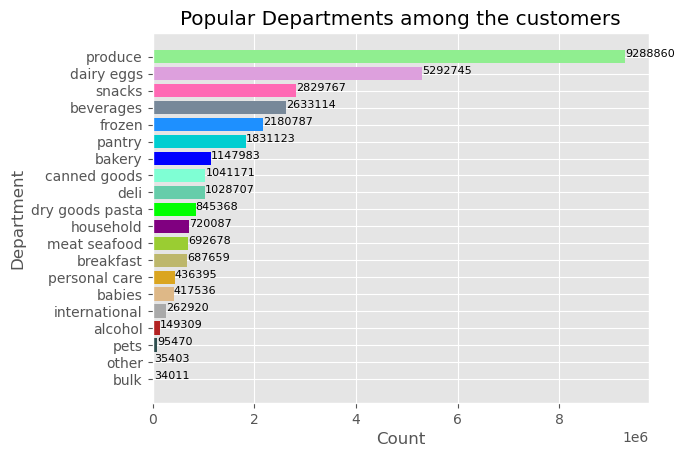

In [56]:
# Generate a bar chart
clrs=['sandybrown','violet','darkslategray','firebrick','darkgrey','burlywood','goldenrod','darkkhaki','yellowgreen','purple','lime','mediumaquamarine','aquamarine','blue','darkturquoise','dodgerblue','lightslategrey','hotpink','plum','lightgreen','lawngreen','gold','orange']

style.use('ggplot')
plt.barh(dept_category,dept_count,height=0.8,color=clrs)

# Add value labels
# index and value are used to position the values labels on the correct bar
# enumerate generates the inbuilt counter 

for index,value in enumerate(dept_count):
    plt.text(value,index, str(value),size=8)
    
# X axis label
plt.xlabel('Count')

# Y axis label
plt.ylabel('Department')

# chart title
plt.title('Popular Departments among the customers')

# save horizondal bar chart as png file
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10-Customer_populardepts_hbarplot.png'),bbox_inches='tight')

In [40]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31718127 entries, 0 to 31718126
Data columns (total 40 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   order_id                float64       
 1   user_id                 float64       
 2   order_number            float64       
 3   orders_day_of_week      float64       
 4   order_hour_of_day       float64       
 5   days_since_prior_order  float64       
 6   product_id              float64       
 7   add_to_cart_order       float64       
 8   reordered               float64       
 9   product_name            object        
 10  aisle_id                float64       
 11  department_id           float64       
 12  prices                  float64       
 13  merge_flag              category      
 14  price_range_loc         object        
 15  Busiest days            object        
 16  busiest_period_of_day   object        
 17  max_order               float64       
 18  

In [41]:
# describe() function gives you a quick list of descriptive statistics for a column
# to suppress the scientific notation, 'lambda' parameter is passed.

df_new.describe().apply(lambda x: x.apply('{0:.5f}'.format))

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average spent,regularity,age,date_joined,no_of_dependants,income
count,31718127.00000,31718127.00000,31718127.00000,31718127.00000,31718127.00000,29869498.00000,31718127.00000,31718127.00000,31718127.00000,31718127.00000,31718127.00000,31718127.00000,31718127.00000,31718127.00000,31718127.00000,31718127.00000,31718127.00000,31718127.00000,31718127.00000
mean,1710510.11848,102949.10392,17.47005,2.74018,13.41885,10.96987,25598.66790,8.35772,0.59793,71.19179,9.92081,7.79037,34.70284,11.96038,10.19653,49.46699,.5f,1.50186,99560.52510
min,2.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,1.00000,1.00000,1.00000,5.00000,1.00000,0.00000,18.00000,.5f,0.00000,25903.00000
25%,855568.00000,51439.00000,5.00000,1.00000,10.00000,5.00000,13544.00000,3.00000,0.00000,31.00000,4.00000,4.20000,15.00000,7.39023,6.00000,33.00000,.5f,1.00000,67157.00000
50%,1710702.00000,102629.00000,11.00000,3.00000,13.00000,8.00000,25300.00000,6.00000,1.00000,83.00000,9.00000,7.40000,28.00000,7.82507,8.00000,49.00000,.5f,2.00000,96700.00000
75%,2565412.00000,154407.00000,24.00000,5.00000,16.00000,15.00000,37947.00000,11.00000,1.00000,107.00000,16.00000,11.30000,49.00000,8.25189,13.00000,65.00000,.5f,3.00000,127988.00000
max,3421083.00000,206209.00000,99.00000,6.00000,23.00000,30.00000,49688.00000,145.00000,1.00000,134.00000,21.00000,25.00000,100.00000,15006.94000,30.00000,81.00000,.5f,3.00000,593901.00000
std,987363.08943,59466.62774,17.58015,2.08972,4.24778,8.68795,14082.59411,7.13138,0.49032,38.21591,6.28193,4.24114,25.03018,81.83571,6.91227,18.48696,nan,1.11883,43090.47800


###  Customer ordering behavior

#### orders among various customer profiles based on loyalty

In [42]:
df_keep['loyalty_flag'].value_counts(dropna=False)

loyalty_flag
Regular customer    16381472
Loyal customer      10679578
New customer         4868929
Name: count, dtype: int64

In [43]:
# create a crosstab and store it in crosstab object

crtab = pd.crosstab(df_new['loyalty_flag'], df_new['customer_profile'], dropna = False,margins=False)
#crosstab

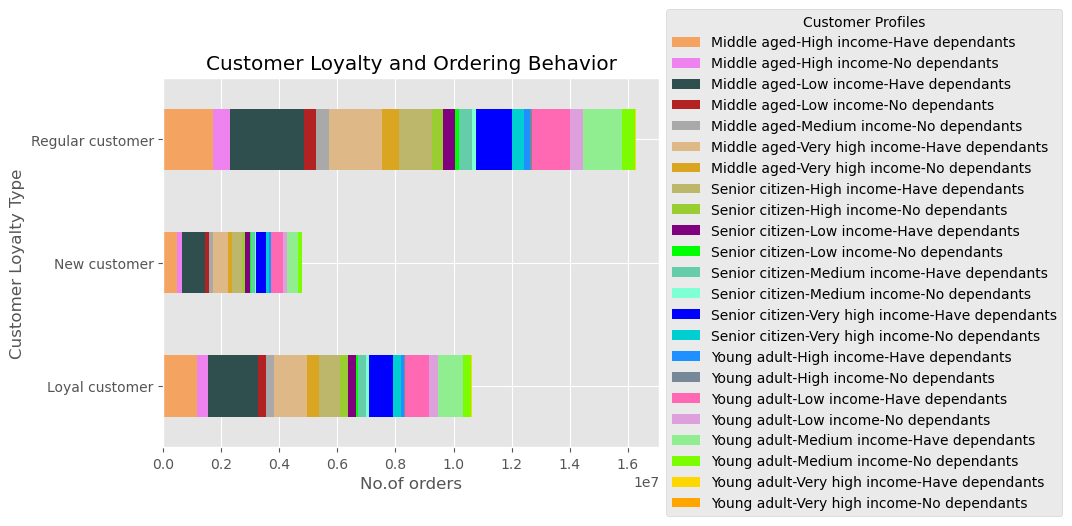

In [57]:
# Create a stacked bar chart from crosstab data to visualize Customer purchase behavior 

colors=['sandybrown','violet','darkslategray','firebrick','darkgrey','burlywood','goldenrod','darkkhaki','yellowgreen','purple','lime','mediumaquamarine','aquamarine','blue','darkturquoise','dodgerblue','lightslategrey','hotpink','plum','lightgreen','lawngreen','gold','orange']
customer_profile_loyalty = crtab.plot.barh(stacked=True,color=colors)

# Add labels and a title and put titled legend next to chart

customer_profile_loyalty.set(xlabel='No.of orders', ylabel='Customer Loyalty Type', title='Customer Loyalty and Ordering Behavior')
customer_profile_loyalty.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Customer Profiles')

# save stacked horizondal bar chart as png file
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10-Customer_loyaltyordrs_stackedbarplot.png'),bbox_inches='tight')

#### Price of orders among various customer profiles

In [45]:
# create a crosstab and store it in crosstab object

crtab1 = pd.crosstab(df_new['price_range_loc'], df_new['customer_profile'], dropna = False,margins=False)
#crosstab

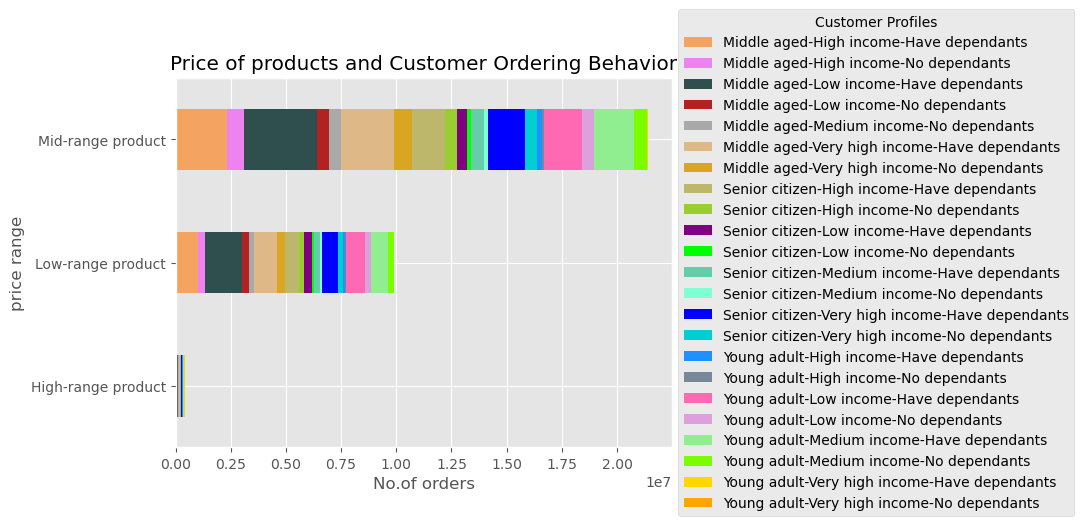

In [58]:
# Create a stacked bar chart from crosstab data to visualize Customer purchase behavior 

colors=['sandybrown','violet','darkslategray','firebrick','darkgrey','burlywood','goldenrod','darkkhaki','yellowgreen','purple','lime','mediumaquamarine','aquamarine','blue','darkturquoise','dodgerblue','lightslategrey','hotpink','plum','lightgreen','lawngreen','gold','orange']
customer_profile_prices = crtab1.plot.barh(stacked=True,color=colors)

# Add labels and a title and put titled legend next to chart

customer_profile_prices.set(xlabel='No.of orders', ylabel='price range', title='Price of products and Customer Ordering Behavior')
customer_profile_prices.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Customer Profiles')

# save stacked horizondal bar chart as png file
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10-Customer_prices_stackedbarplot.png'),bbox_inches='tight')

#### Frequency of orders among various customer profiles

In [47]:
# create a crosstab and store it in crosstab object

crtab2 = pd.crosstab(df_new['order frequency flag'], df_new['customer_profile'], dropna = False,margins=False)
#crosstab

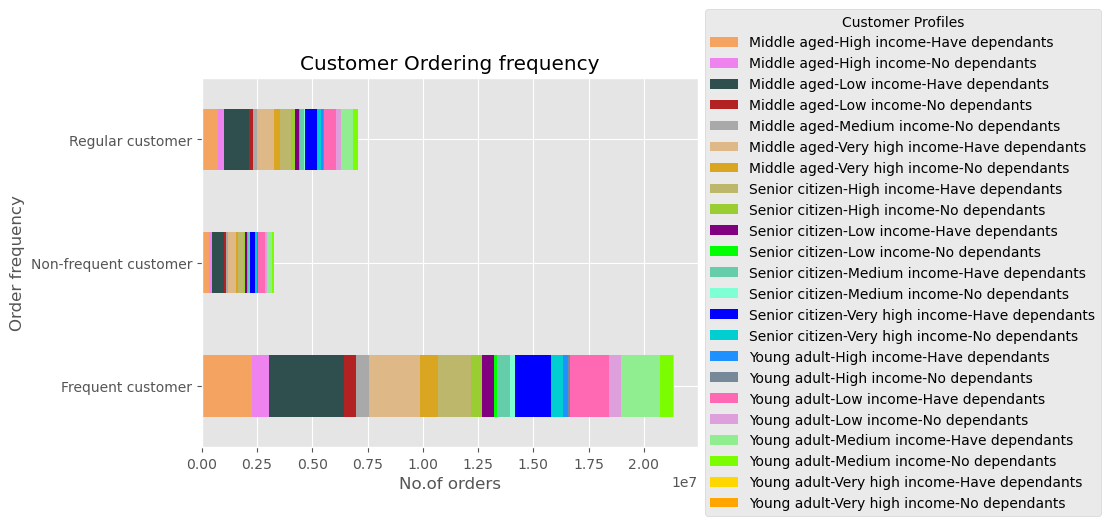

In [59]:
# Create a stacked bar chart from crosstab data to visualize Customer purchase behavior 

colors=['sandybrown','violet','darkslategray','firebrick','darkgrey','burlywood','goldenrod','darkkhaki','yellowgreen','purple','lime','mediumaquamarine','aquamarine','blue','darkturquoise','dodgerblue','lightslategrey','hotpink','plum','lightgreen','lawngreen','gold','orange']
customer_profile_frequency = crtab2.plot.barh(stacked=True,color=colors)

# Add labels and a title and put titled legend next to chart

customer_profile_frequency.set(xlabel='No.of orders', ylabel='Order frequency', title='Customer Ordering frequency')
customer_profile_frequency.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Customer Profiles')

# save stacked horizondal bar chart as png file
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10-Customer_frequency_stackedbarplot.png'),bbox_inches='tight')

In [49]:
# Save dataframe as 'final.pkl' in Prepared Data folder

df_new.to_pickle(os.path.join(path,'02 Data','Prepared Data','final.pkl'))